In [28]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [29]:
# Load the titanic dataset
titanic_df = pd.read_csv("titanic.csv")

# Display the first few rows of the dataset
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:

# Display information about the dataset, such as column names and data types
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [31]:
# Drop the "Cabin" column since it contains a large number of missing values
titanic_df = titanic_df.drop(columns=["Cabin"])

# Handle missing values in the "Age" column
titanic_df = titanic_df.fillna({"Age":titanic_df["Age"].mean()})

# Handle missing values in the "Embarked" column
titanic_df = titanic_df.dropna(subset=["Embarked"], how= 'any')

# Convert categorical variables into numerical variables using one-hot encoding
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])

In [32]:
# Define the features and the target variable
X = titanic_df[['Pclass', 'Sex_male', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
y = titanic_df['Survived']

In [33]:
# Split the dataset into training, development, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [34]:
#Fit a decision tree model to the training set
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

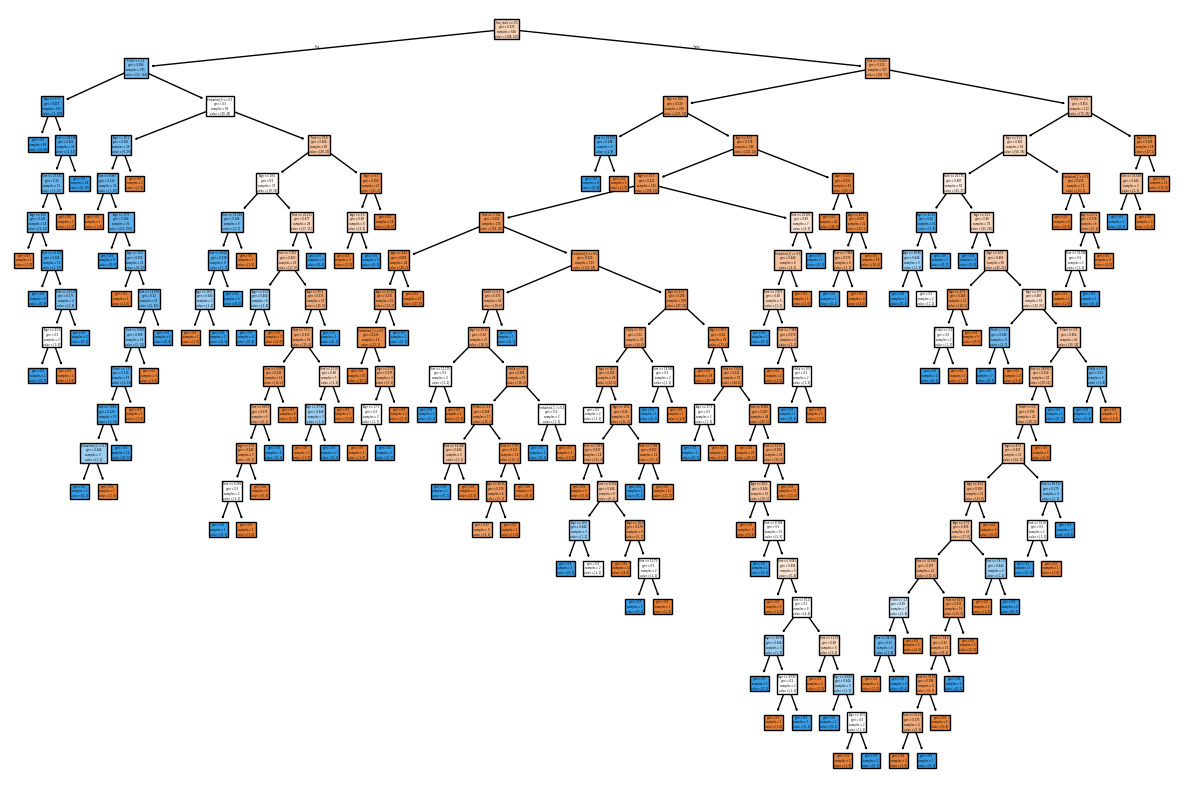

In [35]:
# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(tree, filled=True, feature_names=X.columns.tolist())
plt.show()

In [36]:
# Evaluate the model on the development set
accuracy_dev = tree.score(X_dev, y_dev)

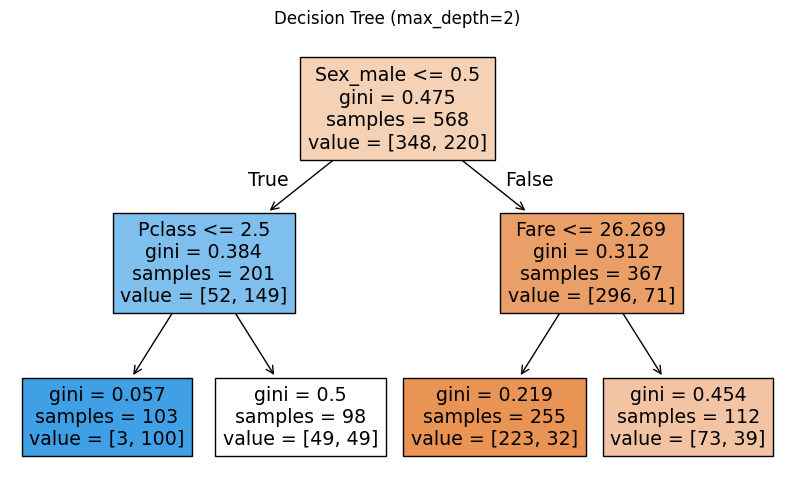

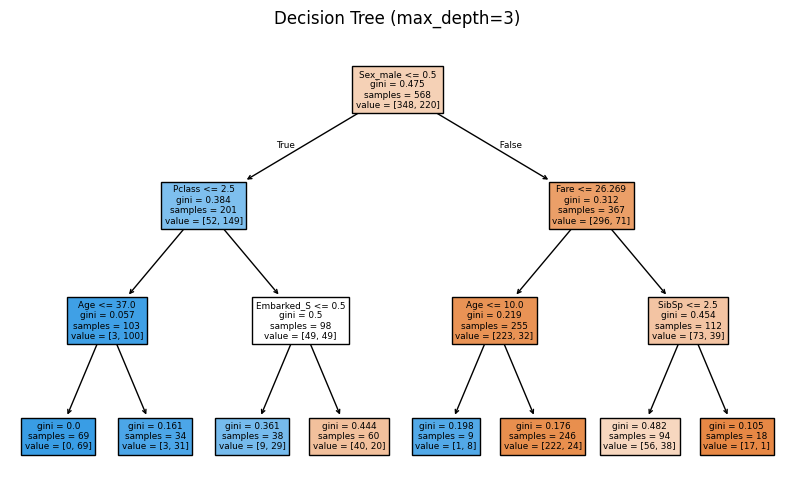

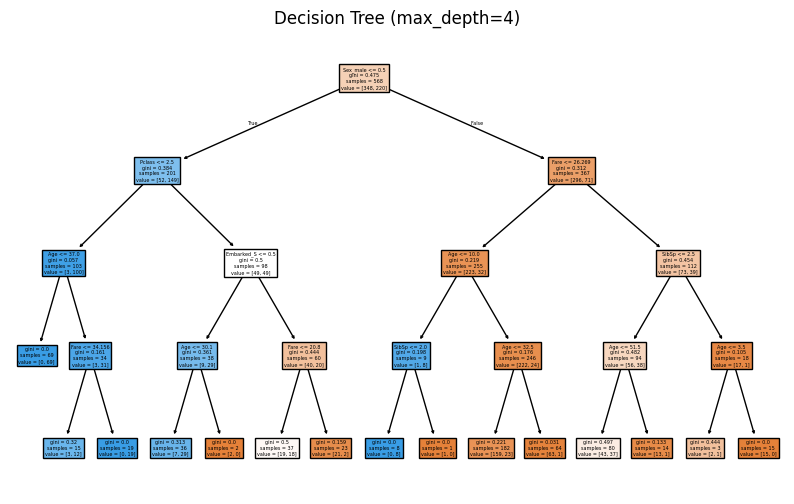

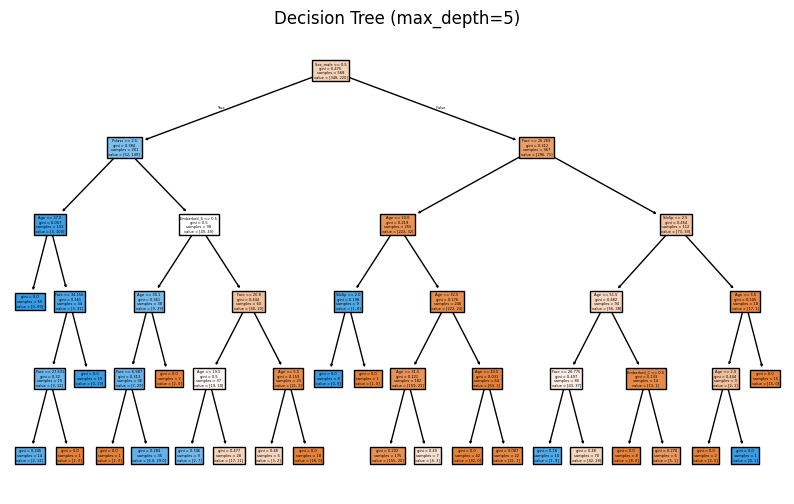

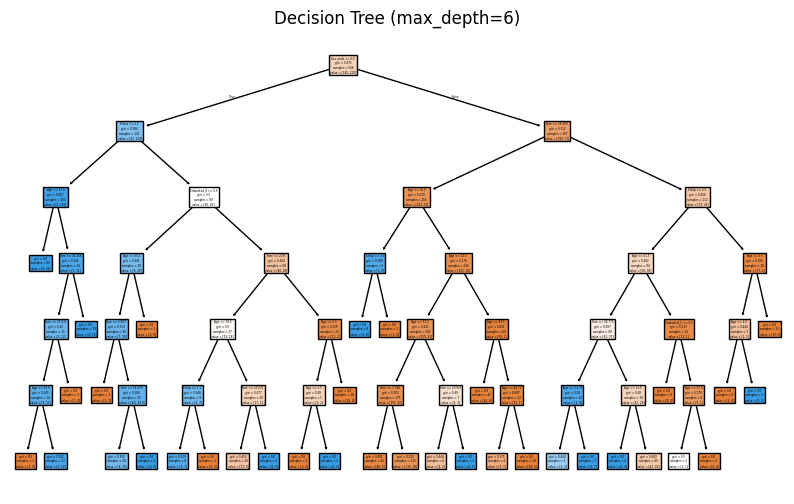

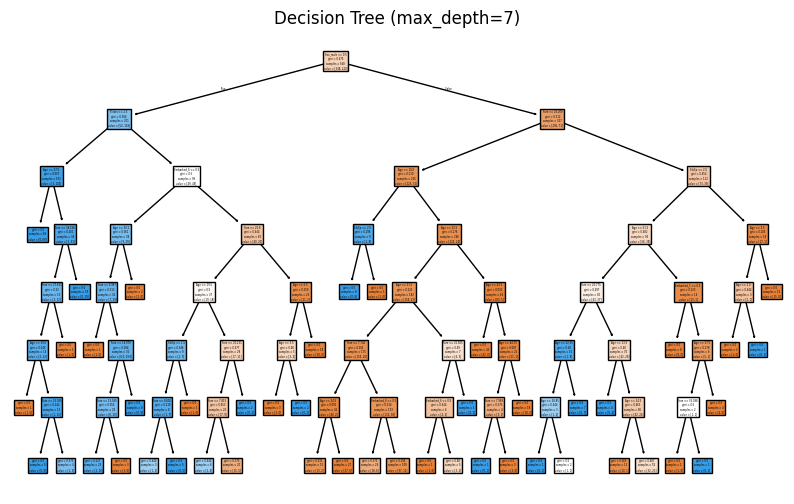

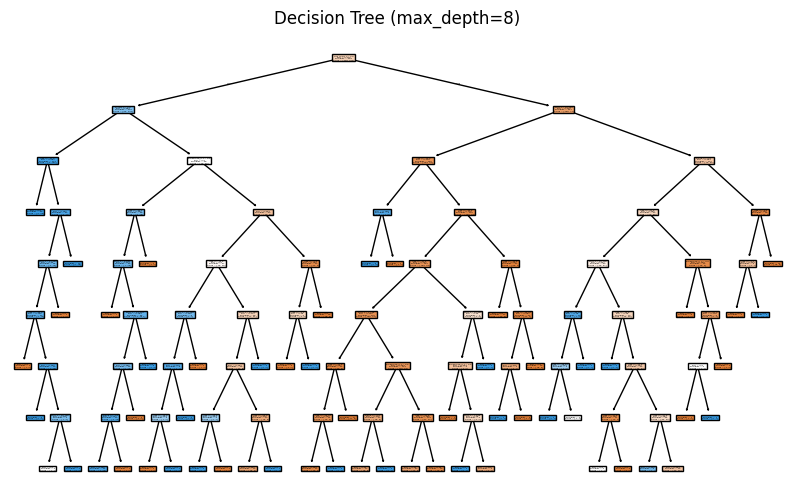

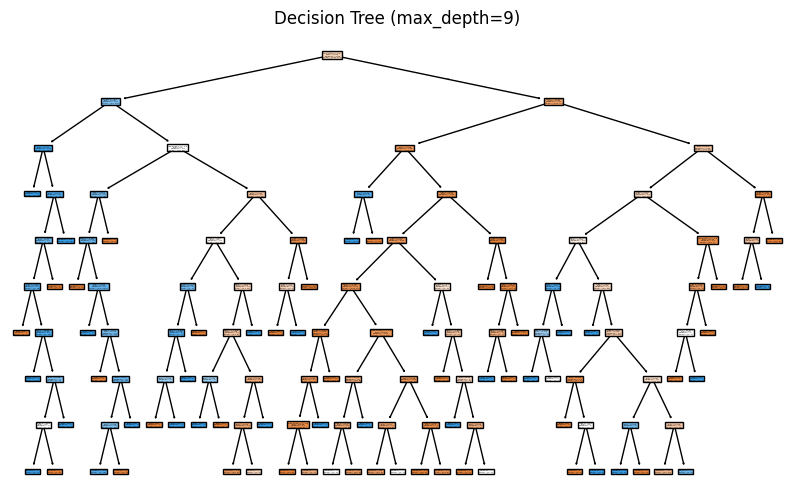

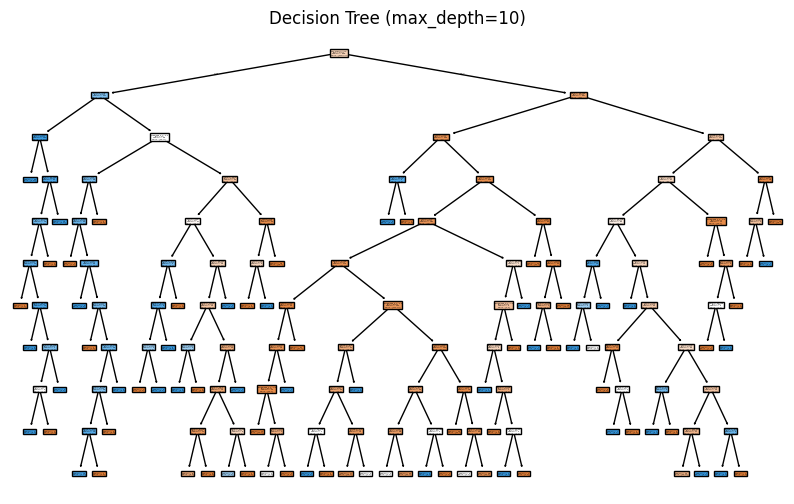

In [37]:
# Determine the optimal max depth
max_depths = range(2, 11)
accuracies_train = []
accuracies_dev = []

for depth in max_depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    accuracies_train.append(tree.score(X_train, y_train))
    accuracies_dev.append(tree.score(X_dev, y_dev))
    
    plt.figure(figsize=(10, 6))
    plot_tree(tree, filled=True, feature_names=list(X.columns))
    plt.title(f"Decision Tree (max_depth={depth})")
    plt.show()

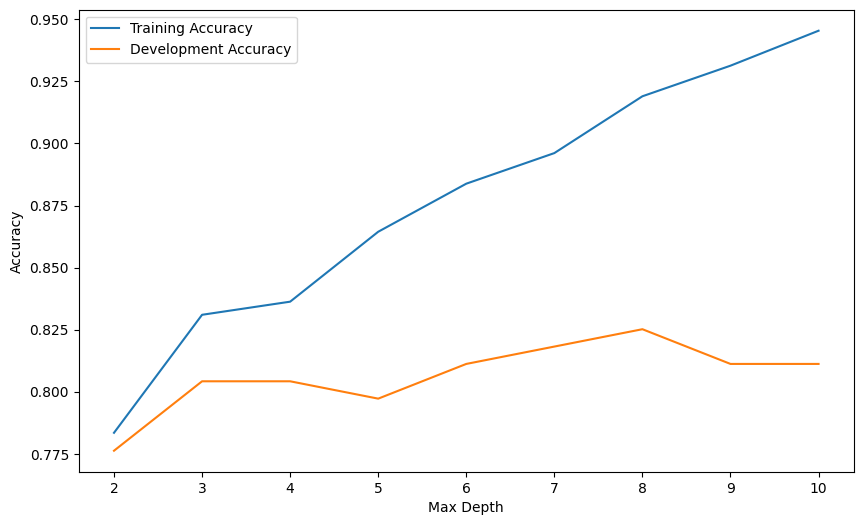

In [38]:
# Plot the training and development accuracies
plt.figure(figsize=(10, 6))
plt.plot(max_depths, accuracies_train, label="Training Accuracy")
plt.plot(max_depths, accuracies_dev, label="Development Accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

the lines represent the model's performance at different depths of the decision tree. The x\-axis represents the maximum depth of the decision tree, while the y\-axis represents the accuracy of the model.

The training accuracy line shows how well the model performs on the training set as the depth of the tree increases. As the depth increases, the model becomes more complex and can better capture the patterns in the training data. Therefore, the training accuracy generally increases with increasing depth.

The development accuracy line represents how well the model generalizes to new, unseen data \(the development set\). Initially, as the depth of the tree increases, the development accuracy also increases. However, after a certain depth, the development accuracy starts to decrease. This indicates that the model is overfitting to the training data and is becoming less effective at generalizing to new data.


In [39]:
# Fit the final decision tree model with optimal max depth
final_max_depth = max_depths[accuracies_dev.index(max(accuracies_dev))]
final_tree = DecisionTreeClassifier(max_depth=final_max_depth, random_state=42)
final_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=42)

In [40]:
# Evaluate the model on the test set
accuracy_test = final_tree.score(X_test, y_test)

# Print the accuracy on the test set
print(f"Accuracy on test set: {accuracy_test}")

Accuracy on test set: 0.8258426966292135
